In [212]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocess

In [213]:
mbti_df = pd.read_csv('mbti_1.csv')

In [214]:
mbti_df.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [215]:
mbti_df.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  neither??? But forced with a gun, I guess buil...
freq    1832                                                  1

In [216]:
mbti_df['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [217]:
mbti_df['first'] = mbti_df.apply(lambda r: r['type'][0], axis=1)
mbti_df['second'] = mbti_df.apply(lambda r: r['type'][1], axis=1)
mbti_df['third'] = mbti_df.apply(lambda r: r['type'][2], axis=1)
mbti_df['forth'] = mbti_df.apply(lambda r: r['type'][3], axis=1)
mbti_df['text_length'] = mbti_df.apply(lambda r: len(r['posts']), axis=1)

In [219]:
mbti_df.head()

type                                              posts first second third  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...     I      N     F   
1  ENTP  'I'm finding the lack of me in these posts ver...     E      N     T   
2  INTP  'Good one  _____   https://www.youtube.com/wat...     I      N     T   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...     I      N     T   
4  ENTJ  'You're fired.|||That's another silly misconce...     E      N     T   

  forth  text_length  
0     J         4652  
1     P         7053  
2     P         5265  
3     J         6271  
4     J         6111

# Count 4 Dimensions

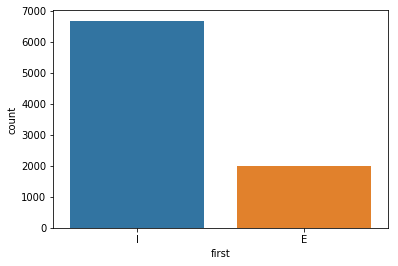

In [220]:
sns.countplot(mbti_df['first'])

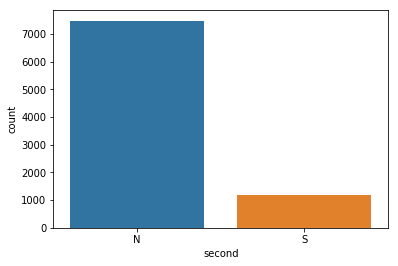

In [221]:
sns.countplot(mbti_df['second'])

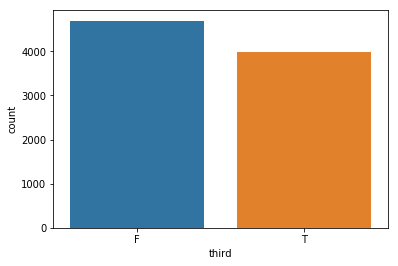

In [222]:
sns.countplot(mbti_df['third'])

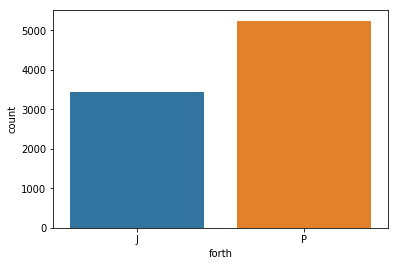

In [225]:
sns.countplot(mbti_df['forth'])

In [227]:
introvert_count, extravert_count = mbti_df['first'].value_counts()

In [230]:
introvert_count, extravert_count

(6676, 1999)

In [238]:
intro_df = mbti_df[mbti_df['first']=='I']
ex_class = mbti_df[mbti_df['first']=='E']
in_class = intro_df.sample(extravert_count)

In [239]:
ex_class.info()
in_class.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 8671
Data columns (total 7 columns):
type           1999 non-null object
posts          1999 non-null object
first          1999 non-null object
second         1999 non-null object
third          1999 non-null object
forth          1999 non-null object
text_length    1999 non-null int64
dtypes: int64(1), object(6)
memory usage: 124.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 6333 to 5273
Data columns (total 7 columns):
type           1999 non-null object
posts          1999 non-null object
first          1999 non-null object
second         1999 non-null object
third          1999 non-null object
forth          1999 non-null object
text_length    1999 non-null int64
dtypes: int64(1), object(6)
memory usage: 124.9+ KB


In [242]:
ex_class.head()

type                                              posts first second  \
1   ENTP  'I'm finding the lack of me in these posts ver...     E      N   
4   ENTJ  'You're fired.|||That's another silly misconce...     E      N   
11  ENFJ  'https://www.youtube.com/watch?v=PLAaiKvHvZs||...     E      N   
22  ENTJ  'Now I'm interested. But too lazy to go resear...     E      N   
24  ENTJ  'Still going strong at just over the two year ...     E      N   

   third forth  text_length  
1      T     P         7053  
4      T     J         6111  
11     F     J         4724  
22     T     J         7304  
24     T     J         6428

In [243]:
in_class.head()

type                                              posts first second  \
6333  ISFP  'Who would you be? Not your life, but the worl...     I      S   
1933  ISTP  'So I recently started working at a grocery st...     I      S   
672   INFP  'Losing your teeth in a dream could allegorica...     I      N   
3461  INTJ  'I'm pretty sure you are an ISFJ.  Firstly, yo...     I      N   
4438  INFJ  'Sorry for the mess but these are my favorite ...     I      N   

     third forth  text_length  
6333     F     P         5655  
1933     T     P         6361  
672      F     P         7438  
3461     T     J         7359  
4438     F     J         9103

In [245]:
mbti_df = pd.concat([in_class, ex_class], axis=0)

In [247]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 6333 to 8671
Data columns (total 7 columns):
type           3998 non-null object
posts          3998 non-null object
first          3998 non-null object
second         3998 non-null object
third          3998 non-null object
forth          3998 non-null object
text_length    3998 non-null int64
dtypes: int64(1), object(6)
memory usage: 249.9+ KB


In [260]:
def clean_text(s):
    s = s.lower()
    return s

In [261]:
ex_class['posts'] = ex_class['posts'].apply(lambda s: s.lower())
in_class['posts'] = in_class['posts'].apply(lambda s: s.lower())

# Most Common Words

In [288]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

def get_word_count(df):
    word_counter = Counter()
    tokenizer = RegexpTokenizer(r'\w+')
    _stopwords = set(stopwords.words('english'))
    for text in df['posts']:
        #tokens = tokenizer.tokenize(text)
        tokens = text.split()
        print(tokens)
        for token in tokens:
            if token in _stopwords:
                continue
            word_counter[token] += 1
    return word_counter
        

In [289]:
in_word_counter = get_word_count(in_class)

["'who", 'would', 'be?', 'life,', 'world.', 'say,', 'ginormous', 'meteor', 'hit', 'earth', 'scientists', 'able', 'predict', 'it,', 'governments', 'world', 'set', 'plan', 'put', 'teams', 'eight...|||wait,', 'that?', 'oh,', "i'm", 'winning?', 'yup.', ':cool:', '*supershinesunglasses*|||:d|||bwahahaha', 'shall', 'rule.|||bwahahahahhaha!!', '>:d', "didn't.", ':mellow:', 'basically', 'every', 'saturday', 'night', 'paint', 'hairdryer.', "xd|||it's", 'going', 'deliciously.', '>:i', 'neverr.', 'gif...', 'xd|||phony', 'win.|||i', 'feel', 'bro.|||looks', 'like', 'may', 'trash', 'talk', 'way', 'one...', 'look!', "there's...", 'trash!...', ':mellow:', '...', 'think', 'may', 'need', 'get', 'better', 'this.', 'oh,', 'l', 'awesome.', ':d', 'upset', 'when...|||thank', 'god', 'know', 'run', 'away.', ':cool:|||:shocked:', 'thank', 'god', "i'm", 'lefty.', ":cool:|||i'm", '(kinda)', 'new', 'too.', ':d', '*high', 'fives*', 'welcome.', ':d|||wait,', "we're", 'intuitive', 'sensor...', "who's", 'sensor', 'int

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [328]:
in_most_common = in_word_counter.most_common(n=400)

In [329]:
ex_word_counter = get_word_count(ex_class)

["'i'm", 'finding', 'lack', 'posts', 'alarming.|||sex', 'boring', 'position', 'often.', 'example', 'girlfriend', 'currently', 'environment', 'creatively', 'use', 'cowgirl', 'missionary.', 'enough...|||giving', 'new', 'meaning', "'game'", 'theory.|||hello', '*entp', 'grin*', "that's", 'takes.', 'converse', 'flirting', 'acknowledge', 'presence', 'return', 'words', 'smooth', 'wordplay', 'cheeky', 'grins.|||this', '+', 'lack', 'balance', 'hand', 'eye', 'coordination.|||real', 'iq', 'test', 'score', '127.', 'internet', 'iq', 'tests', 'funny.', 'score', '140s', 'higher.', 'now,', 'like', 'former', 'responses', 'thread', 'mention', 'believe', 'iq', 'test.', 'banish...|||you', 'know', 'entp', 'vanish', 'site', 'year', 'half,', 'return,', 'find', 'people', 'still', 'commenting', 'posts', 'liking', 'ideas/thoughts.', 'know', 'entp', 'you...|||http://img188.imageshack.us/img188/6422/6020d1f9da6944a6b71bbe6.jpg|||http://img.adultdvdtalk.com/813a0c6243814cab84c51|||i', 'think', 'things', 'sometimes

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [334]:
ex_most_common = ex_word_counter.most_common(n=500)
ex_most_common_words = set([word for word, count in ex_most_common])
in_most_common_words = set([word for word, count in in_most_common])

In [335]:
for word in in_most_common_words:
    if word not in ex_most_common_words:
        print(word)

cannot
living
intps
song
infps
infjs


In [337]:
for word in ex_most_common_words:
    if word not in in_most_common_words:
        print(word)

thing.
serious
listen
giving
curious
move
sex
needs
hurt
entj
course
mine
like,
cause
things.
yeah,
leave
stupid
introverted
female
all,
goes
you?
lol
entp.
myself.
6
lack
welcome
realize
instead
cool
meant
him.
esfp
three
estp
crazy
lots
full
takes
entps
cognitive
advice
god
basically
te
male
estj
ti
enneagram
posted
gonna
super
way,
random
easily
glad
too,
enfj
wants
enfps
yeah
deep
u
relationships
act
xd
lol.
conversation
movie
questions
due
out.
1.
turn
ideas
except
:p
enfp.
yes
ne
group
1
happens
enfp,
stay
said,
se
playing
sent
:d
funny
shit
attention
speak
:
posts
known
together
function
dating
esfj
here,
awesome
type.


# Common Emojis

In [340]:
in_word_counter[':p'], ex_word_counter[':p']

(369, 506)

In [342]:
in_word_counter[':d'], ex_word_counter[':d']

(354, 701)

In [344]:
in_word_counter[':)'], ex_word_counter[':)']

(1130, 1491)

In [347]:
in_word_counter[';)'], ex_word_counter[';)']

(209, 325)

In [350]:
in_word_counter[':('], ex_word_counter[':(']

(137, 180)

In [351]:
in_word_counter[':/'], ex_word_counter[':/']

(98, 102)

In [224]:








from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [137]:
X = mbti_df['posts']
y = mbti_df['first']

In [138]:
X = cv.fit_transform(X)

In [139]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [140]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [141]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [142]:
predictions = nb.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix, classification_report

In [144]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[  75  529]
 [  50 1949]]
             precision    recall  f1-score   support

          E       0.60      0.12      0.21       604
          I       0.79      0.97      0.87      1999

avg / total       0.74      0.78      0.72      2603



In [158]:
introvert_count, extravert_count = mbti_df['first'].value_counts()

In [160]:
mbti_df

type                                              posts first second  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...     I      N   
1     ENTP  'I'm finding the lack of me in these posts ver...     E      N   
2     INTP  'Good one  _____   https://www.youtube.com/wat...     I      N   
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...     I      N   
4     ENTJ  'You're fired.|||That's another silly misconce...     E      N   
5     INTJ  '18/37 @.@|||Science  is not perfect. No scien...     I      N   
6     INFJ  'No, I can't draw on my own nails (haha). Thos...     I      N   
7     INTJ  'I tend to build up a collection of things on ...     I      N   
8     INFJ  I'm not sure, that's a good question. The dist...     I      N   
9     INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...     I      N   
10    INFJ  'One time my parents were fighting over my dad...     I      N   
11    ENFJ  'https://www.youtube.com/watch?v=PLAaiKvHvZs||...     E      N   
12    INFJ  'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...     I      N   
13    INTJ  'Fair enough, if that's how you want to look a...     I      N   
14    INTP  'Basically this...  https://youtu.be/1pH5c1Jkh...     I      N   
15    INTP  'Your comment screams INTJ, bro. Especially th...     I      N   
16    INFJ  'some of these both excite and calm me:  BUTTS...     I      N   
17    INFP  'I think we do agree. I personally don't consi...     I      N   
18    INFJ  'I fully believe in the power of being a prote...     I      N   
19    INFP  'That's normal, it happens also to me. If I am...     I      N   
20    INTP  'Steve Job's was recognized for his striving f...     I      N   
21    INFJ  'It is very annoying to be misinterpreted. Esp...     I      N   
22    ENTJ  'Now I'm interested. But too lazy to go resear...     E      N   
23    INFP  '45016 urh sorry uh. couldn't resist.|||all of...     I      N   
24    ENTJ  'Still going strong at just over the two year ...     E      N   
25    INFP  'Personally, I was thinking this would be more...     I      N   
26    ENFP  'He doesn't want to go on the trip without me,...     E      N   
27    ISFP  'They paint without numbers|||I'd guess at ist...     I      S   
28    INFP  'Basically, my main questions are : What do yo...     I      N   
29    INFJ  'I think that that can absolutely be true of i...     I      N   
...    ...                                                ...   ...    ...   
8645  INFJ  'I play cello, and I'm also a classically trai...     I      N   
8646  INFP  Its more or less based on how YOU experienced ...     I      N   
8647  INTP  Socionics picked up on this.  They call it vis...     I      N   
8648  INFP  'Good advice, thank you.|||I am in a tough sit...     I      N   
8649  INFP  https://www.youtube.com/watch?v=nPDusM-75FE  e...     I      N   
8650  INFJ  'I think the real question is whether INFJs ca...     I      N   
8651  ISTP  '-Being alone -Being insensitive  -Over thinki...     I      S   
8652  ISFJ  'Being assertive and standing up for myself is...     I      S   
8653  INFP  'You should do whatever it is you want. If you...     I      N   
8654  ISTJ  'Assuming I had a hand in it, I always at leas...     I      S   
8655  INFJ  'I find that poster and your facial expression...     I      N   
8656  INFJ  Rim  In some approximate order, it seems like ...     I      N   
8657  INTJ  Social  1) Generally, I positively associate w...     I      N   
8658  ESFJ  'Don't worry, I do that too when a car comes c...     E      S   
8659  ENFP  'leoni I had really bad social anxiety until I...     E      N   
8660  INFP  'I love the vastness of the sky, because my pr...     I      N   
8661  ENTP  '**haven't logged in and read posts for over 6...     E      N   
8662  INTJ  'I can't say I have any one specific belief. I...     I      N   
8663  INTP  'doesn't matter, you don't have a choice, Elec...     I      N   
8664  INTP  'https://www.you

In [162]:
in_class = mbti_df[mbti_df['first']== 'I']
ex_class = mbti_df[mbti_df['first']=='E']

In [194]:
in_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676 entries, 0 to 8674
Data columns (total 7 columns):
type           6676 non-null object
posts          6676 non-null object
first          6676 non-null object
second         6676 non-null object
third          6676 non-null object
forth          6676 non-null object
text_length    6676 non-null int64
dtypes: int64(1), object(6)
memory usage: 737.2+ KB


In [195]:
ex_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 8671
Data columns (total 7 columns):
type           1999 non-null object
posts          1999 non-null object
first          1999 non-null object
second         1999 non-null object
third          1999 non-null object
forth          1999 non-null object
text_length    1999 non-null int64
dtypes: int64(1), object(6)
memory usage: 124.9+ KB


In [196]:
in_class_under = in_class.sample(extravert_count)

In [43]:
in_class_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1681 to 136
Data columns (total 7 columns):
type           1999 non-null object
posts          1999 non-null object
first          1999 non-null object
second         1999 non-null object
third          1999 non-null object
forth          1999 non-null object
text_length    1999 non-null int64
dtypes: int64(1), object(6)
memory usage: 124.9+ KB


In [61]:
mbti_df = pd.concat([in_class_under, ex_class], axis=0)

In [67]:
from nltk.corpus import stopwords

In [169]:
def clean_words(s):
    _stopwords = stopwords.words('english')
    tokens = s.lower().split()
    good_tokens = ' '.join([token for token in tokens if token not in _stopwords])
    return good_tokens
mbti_df['posts'].apply(clean_words)

0       'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1       'i'm finding lack posts alarming.|||sex boring...
2       'good one _____ https://www.youtube.com/watch?...
3       'dear intp, enjoyed conversation day. esoteric...
4       'you're fired.|||that's another silly misconce...
5       '18/37 @.@|||science perfect. scientist claims...
6       'no, can't draw nails (haha). done professiona...
7       'i tend build collection things desktop use fr...
8       i'm sure, that's good question. distinction tw...
9       'https://www.youtube.com/watch?v=w8-egj0y8qs||...
10      'one time parents fighting dad's affair dad pu...
11      'https://www.youtube.com/watch?v=plaaikvhvzs||...
12      'joe santagato - entp|||enfj entp? i'm sure ty...
13      'fair enough, that's want look it. like stated...
14      'basically this... https://youtu.be/1ph5c1jkhl...
15      'your comment screams intj, bro. especially us...
16      'some excite calm me: butts bodies brains comm...
17      'i thi

In [78]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 1681 to 8671
Data columns (total 7 columns):
type           3998 non-null object
posts          3998 non-null object
first          3998 non-null object
second         3998 non-null object
third          3998 non-null object
forth          3998 non-null object
text_length    3998 non-null int64
dtypes: int64(1), object(6)
memory usage: 409.9+ KB


In [79]:
X = mbti_df['posts']


# Machine Learning

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(X)

In [81]:
y = mbti_df['first']

In [82]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [84]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [85]:
predictions = nb.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[491 147]
 [231 451]]
             precision    recall  f1-score   support

          E       0.68      0.77      0.72       638
          I       0.75      0.66      0.70       682

avg / total       0.72      0.71      0.71      1320



In [87]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

In [107]:

classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
X = mbti_df['posts']
y = mbti_df['first']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

for c in classifiers:
    pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', c),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
    pipeline.fit(X_train,y_train)
    predictions = pipeline.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    

[[449 155]
 [107 489]]
             precision    recall  f1-score   support

          E       0.81      0.74      0.77       604
          I       0.76      0.82      0.79       596

avg / total       0.78      0.78      0.78      1200

[[458 146]
 [106 490]]
             precision    recall  f1-score   support

          E       0.81      0.76      0.78       604
          I       0.77      0.82      0.80       596

avg / total       0.79      0.79      0.79      1200

[[464 140]
 [ 98 498]]
             precision    recall  f1-score   support

          E       0.83      0.77      0.80       604
          I       0.78      0.84      0.81       596

avg / total       0.80      0.80      0.80      1200

[[505  99]
 [271 325]]
             precision    recall  f1-score   support

          E       0.65      0.84      0.73       604
          I       0.77      0.55      0.64       596

avg / total       0.71      0.69      0.68      1200

[[455 149]
 [232 364]]
             precision   

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[[505  99]
 [212 384]]
             precision    recall  f1-score   support

          E       0.70      0.84      0.76       604
          I       0.80      0.64      0.71       596

avg / total       0.75      0.74      0.74      1200



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[[390 214]
 [ 61 535]]
             precision    recall  f1-score   support

          E       0.86      0.65      0.74       604
          I       0.71      0.90      0.80       596

avg / total       0.79      0.77      0.77      1200

[[436 168]
 [241 355]]
             precision    recall  f1-score   support

          E       0.64      0.72      0.68       604
          I       0.68      0.60      0.63       596

avg / total       0.66      0.66      0.66      1200



In [98]:
X = mbti_df['posts']
y = mbti_df['first']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [99]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [100]:
predictions = pipeline.predict(X_test)

In [172]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  75  529]
 [  50 1949]]
             precision    recall  f1-score   support

          E       0.60      0.12      0.21       604
          I       0.79      0.97      0.87      1999

avg / total       0.74      0.78      0.72      2603



In [192]:
def clean_words(s):
    _stopwords = stopwords.words('english')
    tokens = s.split()
    good_tokens = ' '.join([token.lower() for token in tokens if token not in _stopwords])
    return good_tokens

In [193]:
in_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676 entries, 0 to 8674
Data columns (total 7 columns):
type           6676 non-null object
posts          6676 non-null object
first          6676 non-null object
second         6676 non-null object
third          6676 non-null object
forth          6676 non-null object
text_length    6676 non-null int64
dtypes: int64(1), object(6)
memory usage: 737.2+ KB


In [197]:
from collections import Counter
introvert_word_counter = Counter()
in_class_under['posts'].apply(clean_words)

3437    'actually we're girls :happy: we've dating yea...
655     '29 still it. never girlfriend. i definitely f...
3133    '[qoute]why cars effectively unchanged 100 yea...
7624    'https://www.youtube.com/watch?v=v5edtjmopf8||...
3034    'introverts battlecry i never learned art verb...
6509    'please forget him. you definitely save marria...
6871    'hang people strong fe users, it'll come natur...
8201    'i'm drowning pain and i'm starting like taste...
6820    'what i'm seeing bit contradiction. i hope non...
6841    'or grow fuck quit self-pity?|||if want assume...
61      'you're taking life seriously, bro. chill. als...
232     'this beautiful shit right here: https://www.y...
6193    'saved us damnation. hero!!!|||your number pos...
3898    'definitely demented anyway. :laughing:|||i am...
1021    'blue|||yeah sure, i tend able pick peoples pe...
8074    'my favorite album ultraviolence- lana del rey...
2024    'provided get chance...i'm canadian enough rec...
6916    'i sus

In [199]:
for row in in_class_under['posts']:
    words = row.split()
    for w in words:
        introvert_word_counter[w] += 1

In [201]:
in_class_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 3437 to 3331
Data columns (total 7 columns):
type           1999 non-null object
posts          1999 non-null object
first          1999 non-null object
second         1999 non-null object
third          1999 non-null object
forth          1999 non-null object
text_length    1999 non-null int64
dtypes: int64(1), object(6)
memory usage: 204.9+ KB


In [206]:
introvert_word_counter.most_common()[:100]

[('I', 89693),
 ('to', 67008),
 ('the', 62353),
 ('a', 53292),
 ('and', 50302),
 ('of', 41148),
 ('is', 29269),
 ('that', 28982),
 ('you', 28504),
 ('in', 27309),
 ('my', 24606),
 ('it', 21658),
 ('for', 19002),
 ('have', 18465),
 ('with', 17578),
 ('but', 17378),
 ('be', 15687),
 ('are', 14672),
 ('like', 14175),
 ('not', 13739),
 ('was', 13144),
 ('on', 13050),
 ("I'm", 12982),
 ('an', 12961),
 ('me', 12816),
 ('as', 12143),
 ('this', 11886),
 ('just', 11026),
 ('about', 10683),
 ('or', 10496),
 ('think', 10436),
 ("don't", 10421),
 ('so', 9799),
 ('do', 9321),
 ('your', 9151),
 ('at', 8671),
 ('what', 8629),
 ('can', 8476),
 ('if', 8331),
 ('people', 8186),
 ('when', 8006),
 ('would', 7351),
 ('more', 7312),
 ('really', 7204),
 ('all', 7040),
 ('know', 6956),
 ('they', 6656),
 ('get', 6526),
 ('from', 6425),
 ('because', 6298),
 ("it's", 6238),
 ('one', 6224),
 ('am', 6211),
 ('i', 6083),
 ('out', 5806),
 ('some', 5693),
 ('-', 5554),
 ('how', 5452),
 ('very', 5374),
 ('feel', 5207)

In [203]:
extravert_word_counter = Counter()
ex_class['posts'].apply(clean_words)

for row in ex_class['posts']:
    words = row.split()
    for w in words:
        extravert_word_counter[w] += 1

In [205]:
extravert_word_counter.most_common()[:100]

[('I', 88122),
 ('to', 65324),
 ('the', 61206),
 ('a', 52647),
 ('and', 51593),
 ('of', 39976),
 ('you', 32126),
 ('is', 30149),
 ('that', 29122),
 ('in', 25726),
 ('my', 23067),
 ('it', 20788),
 ('for', 19252),
 ('with', 18517),
 ('have', 18146),
 ('but', 17106),
 ('be', 16242),
 ('are', 15759),
 ('an', 15273),
 ('like', 14411),
 ('on', 13469),
 ("I'm", 13462),
 ('not', 13345),
 ('me', 12841),
 ('was', 12771),
 ('this', 12260),
 ('as', 12159),
 ('just', 11455),
 ('think', 10913),
 ('about', 10709),
 ('or', 10132),
 ('your', 10077),
 ('so', 10024),
 ("don't", 9818),
 ('do', 9706),
 ('what', 8957),
 ('can', 8908),
 ('if', 8725),
 ('at', 8416),
 ('people', 8094),
 ('when', 7802),
 ('all', 7526),
 ('know', 7408),
 ('would', 7403),
 ('more', 7334),
 ('really', 7206),
 ('get', 7131),
 ('they', 6762),
 ('am', 6401),
 ('because', 6297),
 ('one', 6233),
 ('out', 6129),
 ('we', 6104),
 ('from', 6041),
 ('i', 5982),
 ("it's", 5961),
 ('how', 5851),
 ('very', 5517),
 ('he', 5416),
 ('some', 5340)

In [211]:
intro_most_common = introvert_word_counter.most_common()[:500]
extra_most_common = extravert_word_counter.most_common()
for i in range(len(intro_most_common)):
    word, count = intro_most_common[i]
    for j in range(len(extra_most_common)):
        eword, ecount = extra_most_common[j]
        if word == eword:
            print(word, i, j)

I 0 0
to 1 1
the 2 2
a 3 3
and 4 4
of 5 5
is 6 7
that 7 8
you 8 6
in 9 9
my 10 10
it 11 11
for 12 12
have 13 14
with 14 13
but 15 15
be 16 16
are 17 17
like 18 19
not 19 22
was 20 24
on 21 20
I'm 22 21
an 23 18
me 24 23
as 25 26
this 26 25
just 27 27
about 28 29
or 29 30
think 30 28
don't 31 33
so 32 32
do 33 34
your 34 31
at 35 38
what 36 35
can 37 36
if 38 37
people 39 39
when 40 40
would 41 43
more 42 44
really 43 45
all 44 41
know 45 42
they 46 47
get 47 46
from 48 53
because 49 49
it's 50 55
one 51 50
am 52 48
i 53 54
out 54 51
some 55 59
- 56 60
how 57 56
very 58 57
feel 59 66
we 60 52
I've 61 63
who 62 61
been 63 65
up 64 62
by 65 70
The 66 68
being 67 64
he 68 58
much 69 67
want 70 73
had 71 75
other 72 72
time 73 77
than 74 82
will 75 74
say 76 76
has 77 79
only 78 80
see 79 71
love 80 69
them 81 81
there 82 83
things 83 87
something 84 89
most 85 84
good 86 78
always 87 85
make 88 86
no 89 88
their 90 91
It 91 96
way 92 95
even 93 98
could 94 92
lot 95 94
too 96 93
But 97 90
